# Exercise: Weather API

## Aim: Use a Weather API to create and graph NetCDF files

### Issues covered:

- Request and get data from a weather API service
- Read and retrieve information from a JSON response
- Write contents to a NetCDF file
- Read a collection of NetCDF files and plot a time series graph

## 1. Let's get data from a web API on the internet

We will use the NOAA National Weather Service in the US as our data source:

![](https://www.weather.gov/css/images/header.png)

The service has a web API that allows you to request forecast data for a given grid point in the USA. Details of the API are documented at:

https://www.weather.gov/documentation/services-web-api

Use the endpoint `https://api.weather.gov/` as the base URL.

Firstly, we want to get a grid ID and based on some latitude/longitude coordinates. To do so we will use the `points/{latitude,longitude}` endpoint of the API.

**Choose the latitude and longitude of your favourite US location (this API is US only and in latitude North, longitude East). The extent of the USA is approximately:**
- Longitude: -120, -80
- Latitude:  30, 48

Once you have queried the `points` API you will get back a `grid ID` (`GridId`). The `grid ID`h can be used to get a weather forecast for your location of interest, using the `gridpoints/{grid ID}/{grid co-ordinates}` endpoint.

Import the `requests` library which is great for downloading content from external URLs.

In [1]:
import requests

# longitude:-122.485417, latitude:37.859306
# https://api.weather.gov/points/37.8593,-122.4854

You can use the requests library to access the web API. Fill in the elipses with the `latitude` (degrees North) and `longitude` (degrees East, so use negative value) of a location in the US. 
If successful, the response code should be 200.

In [2]:
url = 'https://api.weather.gov/'
latitude = 37.859306
longitude = -122.485417

# Hint: use the requests library to GET from the url: https://api.weather.gov/points/{LAT},{LON}
response = requests.get(f'{url}points/{latitude},{longitude}')
response.status_code

200

In [3]:
type(response)
# We want the content from response that's in json format i.e.
# rep = response.json()
# type(rep)

requests.models.Response

With the requests library, the results from the webAPI can be extracted into in JSON format. A JSON document behaves exactly like a dictionary.

Use dictionary indexing to extract the values of the grid ID and the X/Y coordinates:

- get `gridID`
- get `gridX`
- get `gridY`

In [4]:
# hint: you can view the JSON by pasting the URL directly into your browser address bar

#response = response.json()  # This reads the request as json and decodes it into a dictionary
rep = response.json() 

assert "properties" in rep # Check that rep contains what we expect

#type(d)
#d.keys()
#d['geometry']
#d['geometry'].keys()   # Call keys method on the dictionary
#d['geometry']['coordinates']
#type(d['geometry']['coordinates'])   # number of square brackets tells you the dimensions
#d['geometry']['coordinates'][0][3][0]

# The json file contains 
#print(response["properties"]["gridId"])

gridID = rep["properties"]["gridId"]    # gridID is part of a dictionary in the properties list?? key, number
gridX = rep["properties"]["gridX"]
gridY = rep["properties"]["gridY"]

# Alternatively you could write as follows
#props = rep["properties"]
#gridID = props["gridId"]   
#gridX = props["gridX"]
#gridY = props["gridY"]

print(gridID,gridX,gridY)

MTR 83 109


With your `gridID`, `gridX`, and `gridY`, use the `gridpoints` API endpoint to request a weather forecast for that location. Print the status code.
If everything is working, you should get another 200 status code.

In [5]:
response = requests.get(f'{url}gridpoints/{gridID}/{gridX},{gridY}')
response.status_code

200

Can you use the JSON response data to get the forecast temperature values? Use dictionary indexing to get the `values` from `temperature` in `properties`.

In [6]:
data = response.json()

print(type(data))                                         # <class 'dict'>
print(data.keys())                                        # dict_keys(['@context', 'id', 'type', 'geometry', 'properties'])
print(type(data['properties']))
print(data['properties'].keys())
print(type(data['properties']['temperature']))
print(data['properties']['temperature'].keys())
print(type(data['properties']['temperature']['values']))  # <class 'list'>
#print((data['properties']['temperature']['values']))

forecast = data['properties']['temperature']['values']

<class 'dict'>
dict_keys(['@context', 'id', 'type', 'geometry', 'properties'])
<class 'dict'>
dict_keys(['@id', '@type', 'updateTime', 'validTimes', 'elevation', 'forecastOffice', 'gridId', 'gridX', 'gridY', 'temperature', 'dewpoint', 'maxTemperature', 'minTemperature', 'relativeHumidity', 'apparentTemperature', 'wetBulbGlobeTemperature', 'heatIndex', 'windChill', 'skyCover', 'windDirection', 'windSpeed', 'windGust', 'weather', 'hazards', 'probabilityOfPrecipitation', 'quantitativePrecipitation', 'iceAccumulation', 'snowfallAmount', 'snowLevel', 'ceilingHeight', 'visibility', 'transportWindSpeed', 'transportWindDirection', 'mixingHeight', 'hainesIndex', 'lightningActivityLevel', 'twentyFootWindSpeed', 'twentyFootWindDirection', 'waveHeight', 'wavePeriod', 'waveDirection', 'primarySwellHeight', 'primarySwellDirection', 'secondarySwellHeight', 'secondarySwellDirection', 'wavePeriod2', 'windWaveHeight', 'dispersionIndex', 'pressure', 'probabilityOfTropicalStormWinds', 'probabilityOfHurric

The below code extracts the coordinates of the grid box you have chosen.

In [7]:
coords = data['geometry']['coordinates'][0][0]
x = coords[1]
y = coords[0]

## 2. Let's format that data and write it to NetCDF

### Formatting the data

First, format your forecast data to get the datetime and air temperature as separate
lists.

In [8]:
from datetime import datetime as dt         # the datetime module contains a class called datetime

Loop through your `forecast` values and get the temperatures (`value`) and datetimes (`validTime`) into a list.
`forecast` is a list of dictionaries, where each dictionary is of one time instance.
Fill in the ellipses to format each `validTime` string to a python `datetime` object and assign and set to the variable `date`. Get each `value` and assign to the variable `temp`. These values will then be appended to the `temps` and `timeseries` lists.

In [9]:
# Use the datetime module to convert the times from the data to a datetime object.
# Hint: look at the validTime string and see how you can turn the string to datetime
# using strptime, the format of the datetime is: '%Y-%m-%dT%H:%M:%Sz'.

timeseries = []
temps = []

# 'forecast' is a list of dictionaries, where each dictionary is of one time instance
for item in forecast:
    #print(item)
    # Extract time and temp from the forecast dictionary:
    date, temp = item['validTime'], item['value']  
    # Split the date string at the '/' character to remove 
    date = dt.strptime(date.split(sep='/')[0], '%Y-%m-%dT%H:%M:%S%z')

    # call datetime (dt) class and strptime module
    
    #print(date)
    #print(temp)
    timeseries.append(date)
    temps.append(temp)

#help(dt)
#dir(d)                        # Lists the methods available (e.g. split)
#help(d.split)                 # Provides info on a specific method
#print(d.split(sep='/')[0])
#d.split(sep='/')[0]

#print(timeseries)
#print(temps)

Format the `timeseries` list and convert it to relative time in seconds from the start of the timeseries. When using NetCDF and the CF Metadata Conventions time is stored as an offset from a base time rather than an absolute times.

If you are stuck, take look at the 'Time series' slide in the [logging data from serial ports](https://github.com/ncasuk/ncas-isc/raw/68abbfd3a573e576c32fc127fafc874bfff98b1e/python/presentations/logging-data-from-serial-ports/LDFSP_Slides.pdf) presentation.

In [10]:
base_time = timeseries[0]
time_values = []

#for t in timeseries:
#    ...
#
#time_units = ...

for t in timeseries:
    value = t - base_time
    ts = value.total_seconds()
    time_values.append(ts)

time_units = "seconds since " + base_time.strftime('%Y-%m-%d %H:%M:%S')

In [11]:
t0 = timeseries[0]
t1 = timeseries[1]
delta = t1-t0
print(type(t0))
print(type(delta))
help(delta.total_seconds)

<class 'datetime.datetime'>
<class 'datetime.timedelta'>
Help on built-in function total_seconds:

total_seconds(...) method of datetime.timedelta instance
    Total seconds in the duration.



Convert the `temps` list from degrees C to Kelvin. As per the CF Conventions, the canonical units for Air Temperature is K. Create a new list, called `temp_values`, which is the temperature in Kelvin.

In [12]:
temp_values = []

for t in temps:
    # Convert 
    temp = t + 273.15
    temp_values.append(temp)     # Use append method to add a value

# Alternatively you can write this on one line as a list comprehension
# Start with empty list
# On the right-hand side put in condition (e.g. a for loop)
# On the left-hand side put the action 
# at end of list put for loop and at start of list with action
# temp_value = [{action} {for loop}]

temp_value = [temp + 273.15 for t in temps]

### Create a netCDF4 Dataset and write the contents to a file

Import the `Dataset` class from the `netCDF4` library. You can go on to create an *instance* of this class which will contain:
- variables
- coordinate variables
- dimensions
- global attributes

When you create the instance of `Dataset`, you will give it a file name which will be written to when you close the `Dataset`.

Also import `numpy` as `np`. This will be used to construct the data arrays from the existing lists that currently hold the weather data and coordinate information.


In [13]:
from netCDF4 import Dataset
import numpy as np

#### Quick aside, let's make sure we have a `DATA_DIR` to write to

Since this is a group exercise, everyone should be writing to the same output directory. Let's set some python variables that can be used below:
1. `USER` - used in the output file names to ensure every NetCDF file is unique.
2. `HOME_DIR` - your `$HOME` directory
2. `MY_DATA_DIR` - the directory where you will write your NetCDF file.
3. `GROUP_DATA_DIR` - the directory where all the NetCDF files will eventually be collected/available.

Since `GROUP_DATA_DIR` is not writeable directly from the Notebook Service, we have set up a job to replicate files from `MY_DATA_DIR` to `GROUP_DATA_DIR` (which runs once per minute).

In [14]:
import os
USER = os.environ["JUPYTERHUB_USER"]

HOME_DIR = f"/home/users/{USER}"
MY_DATA_DIR = os.path.join(HOME_DIR, "weather-api-outputs")

# Create MY_DATA_DIR if it doesn't exist
if not os.path.isdir(MY_DATA_DIR):
    os.mkdir(MY_DATA_DIR)

# All NetCDF will be automatically copied here (once per minute)
GROUP_DATA_DIR = "/gws/pw/j07/workshop/weather-api-data"

# The output file will initially be written to your HOME_DIR (then you will move
# it when complete)
filename = f"{gridID}-{USER}-temps.nc"
outfile = f"{HOME_DIR}/{filename}"

#### Back to our NetCDF file

Create the output file, as a `netCDF4 Dataset` instance, using the `outfile` defined above.

If you need help, have a look at the 'Create the NetCDF dimensions & variables' slide in the [logging data from serial ports](https://github.com/ncasuk/ncas-isc/raw/68abbfd3a573e576c32fc127fafc874bfff98b1e/python/presentations/logging-data-from-serial-ports/LDFSP_Slides.pdf) presentation.

In [15]:
dataset = Dataset(outfile, 'w', format='NETCDF4')

#### Start by defining some dimensions

Create NetCDF *dimensions*:
- `time_dim`: *unlimited* length
- `lat_dim`: length 1
- `lon_dim`: length 1

In [16]:
time_dim = dataset.createDimension('time', None)
lat_dim = dataset.createDimension('lat', 1)
lon_dim = dataset.createDimension('lon', 1)

#### Now define the coordinate variables and then temperature variable

Create the `time` *variable* with the following properties:
- type: numpy float (`np.float64`)
- variable id: `time`
- dimensions: (`time`,)
- set the array using the `time_values` list
- `units`: `time_units` defined earlier
- `standard_name`: `time`
- `calendar`: `standard`

In [17]:
time_var = dataset.createVariable('time', np.float64, ('time',)) # Set up variable name, type, and dimensions
time_var[:] = time_values                                            # Assign the values to time_var
time_var.units = time_units
time_var.standard_name = 'time'
time_var.calendar = 'standard'

Create the `lat` *variable* with the following properties:
- type: numpy float (`np.float64`)
- variable id: `lat`
- dimensions: (`lat`,)
- set the array of length 1 using the `gridY` value
- `units`: `degrees_north`
- `standard_name`: `latitude`

In [18]:
lat_var = dataset.createVariable('lat', np.float64, ('lat',)) 
lat_var[:] = gridY
lat_var.units = 'degrees_north'
lat_var.standard_name = 'latitude'

Create the `lon` *variable* with the following properties:
- type: numpy float (`np.float64`)
- variable id: `lon`
- dimensions: (`lon`,)
- set the array of length 1 using the `gridX` value
- `units`: `degrees_east`
- `standard_name`: `longitude`

In [19]:
lon_var = dataset.createVariable('lon', np.float64, ('lon',)) 
lon_var[:] = gridX
lon_var.units = 'degrees_east'
lon_var.standard_name = 'longitude'

Create the `temp` *variable* with the following properties:
- type: numpy float (`np.float64`)
- variable id: `temp`
- dimensions: (`time`,)
- set the array using the `temp_values` list
- `long_name`: `air temperature (K)`
- `units`: `K`
- `standard_name`: `air_temperature`
- `coordinates`: `lon lat` - to relate the longitude and latitude to this variable

In [20]:
temp_var = dataset.createVariable('temp', np.float64, ('time',))
temp_var[:] = temp_values
temp_var.var_id = 'temp'
temp_var.long_name = 'air temperature (K)'
temp_var.units = 'K'
temp_var.standard_name = 'air_temperature'
temp_var.coordinates = 'lon lat'

#### Add some global attributes

The [CF Metadata Conventions](https://cfconventions.org/cf-conventions/cf-conventions.html#_overview) recommends a set of global attributes to "provide human readable documentation of the file contents":
- title
- history
- institution
- source
- references
- comment

Add each of the above to your `Dataset` instance. Here are some suggested values (but you can say whatever you like):
- title: Air Temperature forecasts for `<gridID>`
- history: File created on: `<YYYY-MM-DD>`
- institution: NCAS-ISC
- source: NOAA Weather API Service
- references: https://www.weather.gov/documentation/services-web-api
- comment: The ISC course is teaching me about Python and NetCDF!

You can add any other global attributes that you wish to.

In [21]:
dataset.title = f'Air Temperature forecasts for {gridID}'
print(dt.now())
type(dt.now())
#help(dt)
#cdate = dt.strptime(dt.now(), '%Y-%m-%dT%H:%M:%S%z')
dataset.history = f'File created on: {dt.now().strftime("%Y-%m-%d")}'
dataset.institution = 'NCAS-ISC'
dataset.source = 'NOAA Weather API Service'
dataset.references = 'https://www.weather.gov/documentation/services-web-api'
dataset.comment = 'The ISC course is teaching me about Python and NetCDF!'

2023-03-02 14:49:39.319853


#### Finally, close the `Dataset` to save the file

Save your NetCDF file by closing the dataset.

In [22]:
dataset.close()

We can check it is there using `os.path.isfile(...)`:

In [24]:
os.path.isfile(outfile)

True

### IMPORTANT: Move the file to your MY_DATA_DIR so it gets copied to the GROUP_DATA_DIR

Since we cannot write directly to the `GROUP_DATA_DIR`, move the file from your `HOME_DIR` to your `MY_DATA_DIR`.

In [25]:
os.rename(outfile, f"{MY_DATA_DIR}/{filename}")

## 3. Find all the NetCDF files written during this exercise

To find all the `.nc` files in a group workspace, we will use the glob module in Python.
Glob let's us find all files matching a pattern, in our case:

`{GROUP_DATA_DIR}/*.nc`

In [26]:
from glob import glob

Can you use glob to make a list of file paths of all NetCDF files in the
group workspace?

In [33]:
filepaths = glob(f"{GROUP_DATA_DIR}/*temps.nc")
print(filepaths)

['/gws/pw/j07/workshop/weather-api-data/TOP-train041-temps.nc', '/gws/pw/j07/workshop/weather-api-data/MLB-train024-temps.nc', '/gws/pw/j07/workshop/weather-api-data/HGX-train015-temps.nc', '/gws/pw/j07/workshop/weather-api-data/TOP-train022-temps.nc', '/gws/pw/j07/workshop/weather-api-data/EAX-train041-temps.nc', '/gws/pw/j07/workshop/weather-api-data/TOP-train008-temps.nc', '/gws/pw/j07/workshop/weather-api-data/FFC-train030-temps.nc', '/gws/pw/j07/workshop/weather-api-data/FGZ-train016-temps.nc', '/gws/pw/j07/workshop/weather-api-data/RIW-train012-temps.nc']


## 4. Create a time-series graph of all the forecasts

Now that we have a list of NetCDF file paths, we can open them and extract their data.

To start, let us make the a plot using matplotlib.

In [31]:
from netCDF4 import num2date
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

Create a subplots figure with figure and axis

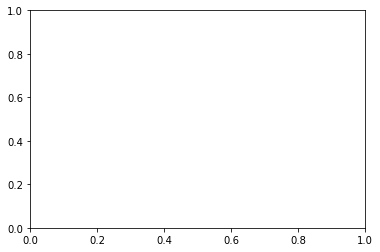

In [32]:
fig, ax = plt.subplots()

Can you set the x-axis locator (ticks) using dates class from matplotlib?
- set the major locator to days.
- set the minor locator to every 6 hours.
- set the x-axis formatter to Day-Month for each day.

In [40]:
# In the matplotlib.dates module, as mdates, look at the DayLocator and HourLocator.
#help(mdates)  # help on module
#* `HourLocator`: Locate hours.
#* `DayLocator`: Locate specified days of the month.

fmt_day = mdates.DayLocator()
fmt_six_hours = mdates.HourLocator(interval=6)

ax.xaxis.set_major_locator(fmt_day)
ax.xaxis.set_minor_locator(fmt_six_hours)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

#plt.show()

Label the axis, `ax`, on the plot:
- label the x-axis as `Date`
- label the y-axis as `Air Temperature / K`
- set a title on your plot

In [42]:
ax.set_xlabel('Date')
ax.set_ylabel('Air Temperature / K')
ax.set_title('Air Temperature Plot')

Text(0.5, 1.0, 'Air Temperature Plot')

Open each NetCDF file and extract the `temp`, `time`, `lat` and `lon` variables from the file. Then use the matplotlib `plot_date` function to plot the graph.

- set the label of plot to the `<lat>, <lon>` coordinates attribute of the `temp` variable.

Replace the elipses with your plotting, the `for` loop works through all the shared NetCDF files in the workspace, where `f` is the file path and `filepaths` is a list of data files.

If you need help, look at the 'Plotting data with matplotlib' slide in the [logging data from serial ports](https://github.com/ncasuk/ncas-isc/raw/68abbfd3a573e576c32fc127fafc874bfff98b1e/python/presentations/logging-data-from-serial-ports/LDFSP_Slides.pdf) presentation.

Plot a line graph using matplotlib: 

- you will need to set the marker to `-` otherwise you will get a scatter graph.
- set the label of the plot to a string: `<lat>, <lon>`.

In [45]:
for f in filepaths:
    data = Dataset(f)  # read file
    print(data.file_format)
    print(list(dataset.dimensions.keys()))
    print(list(dataset.variables.keys()))


NETCDF4_CLASSIC
['time', 'lat', 'lon']
['time', 'lat', 'lon', 'temp']
NETCDF4
['time', 'lat', 'lon']
['time', 'lat', 'lon', 'temp']
NETCDF4_CLASSIC
['time', 'lat', 'lon']
['time', 'lat', 'lon', 'temp']
NETCDF4_CLASSIC
['time', 'lat', 'lon']
['time', 'lat', 'lon', 'temp']
NETCDF4_CLASSIC
['time', 'lat', 'lon']
['time', 'lat', 'lon', 'temp']
NETCDF4_CLASSIC
['time', 'lat', 'lon']
['time', 'lat', 'lon', 'temp']
NETCDF4_CLASSIC
['time', 'lat', 'lon']
['time', 'lat', 'lon', 'temp']
NETCDF4_CLASSIC
['time', 'lat', 'lon']
['time', 'lat', 'lon', 'temp']
NETCDF4_CLASSIC
['time', 'lat', 'lon']
['time', 'lat', 'lon', 'temp']


Finally, show the plot with a legend, you might want to enable tight layout,
and save the plot to your `MY_DATA_DIR` directory.

In [ ]:
...

### Save the graph to a PNG file

In [ ]:
fig.savefig(f"{MY_DATA_DIR}/{gridID}-{USER}-temps.png")